# Problem Statement: Song Recommendation Model based on Sound Features & Genres

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation
import plotly.express as px

### Get the cleaned dataset

In [2]:
cleaned_tracks = pd.read_csv('cleaned_dataset.csv')

### Examining some sound features:
Here, we plot the distribution of values of duration_ms, energy and loudness to see the distribution of these variables across the DataFrame.

<Axes: xlabel='loudness'>

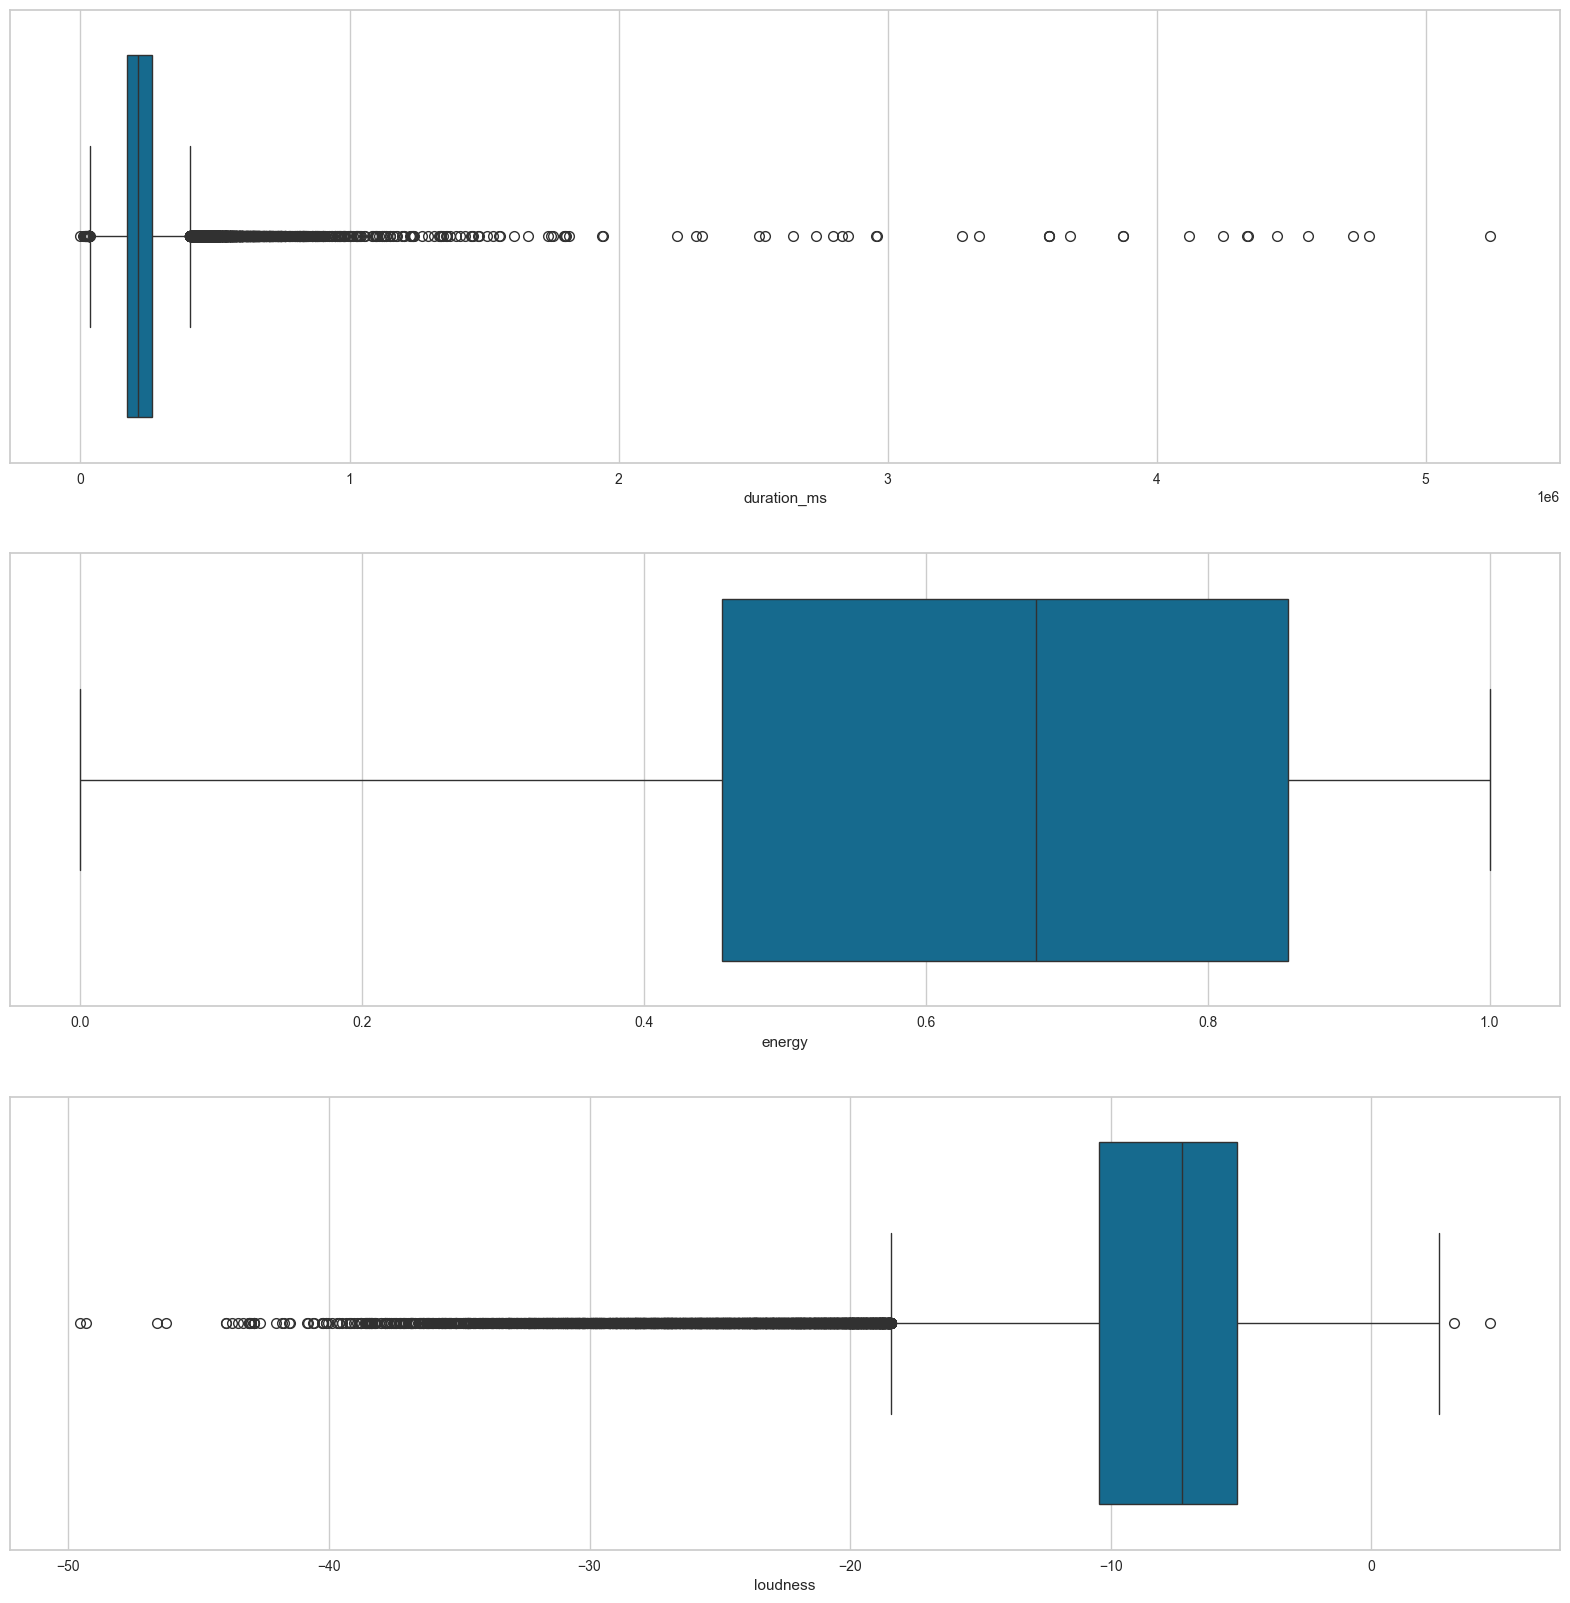

In [3]:
f, axes = plt.subplots(3, 1, figsize=(20, 20))

sb.boxplot(data = cleaned_tracks["duration_ms"], orient = "h", ax = axes[0])
sb.boxplot(data = cleaned_tracks["energy"], orient = "h", ax = axes[1])
sb.boxplot(data = cleaned_tracks["loudness"], orient = "h", ax = axes[2])

<Axes: xlabel='loudness'>

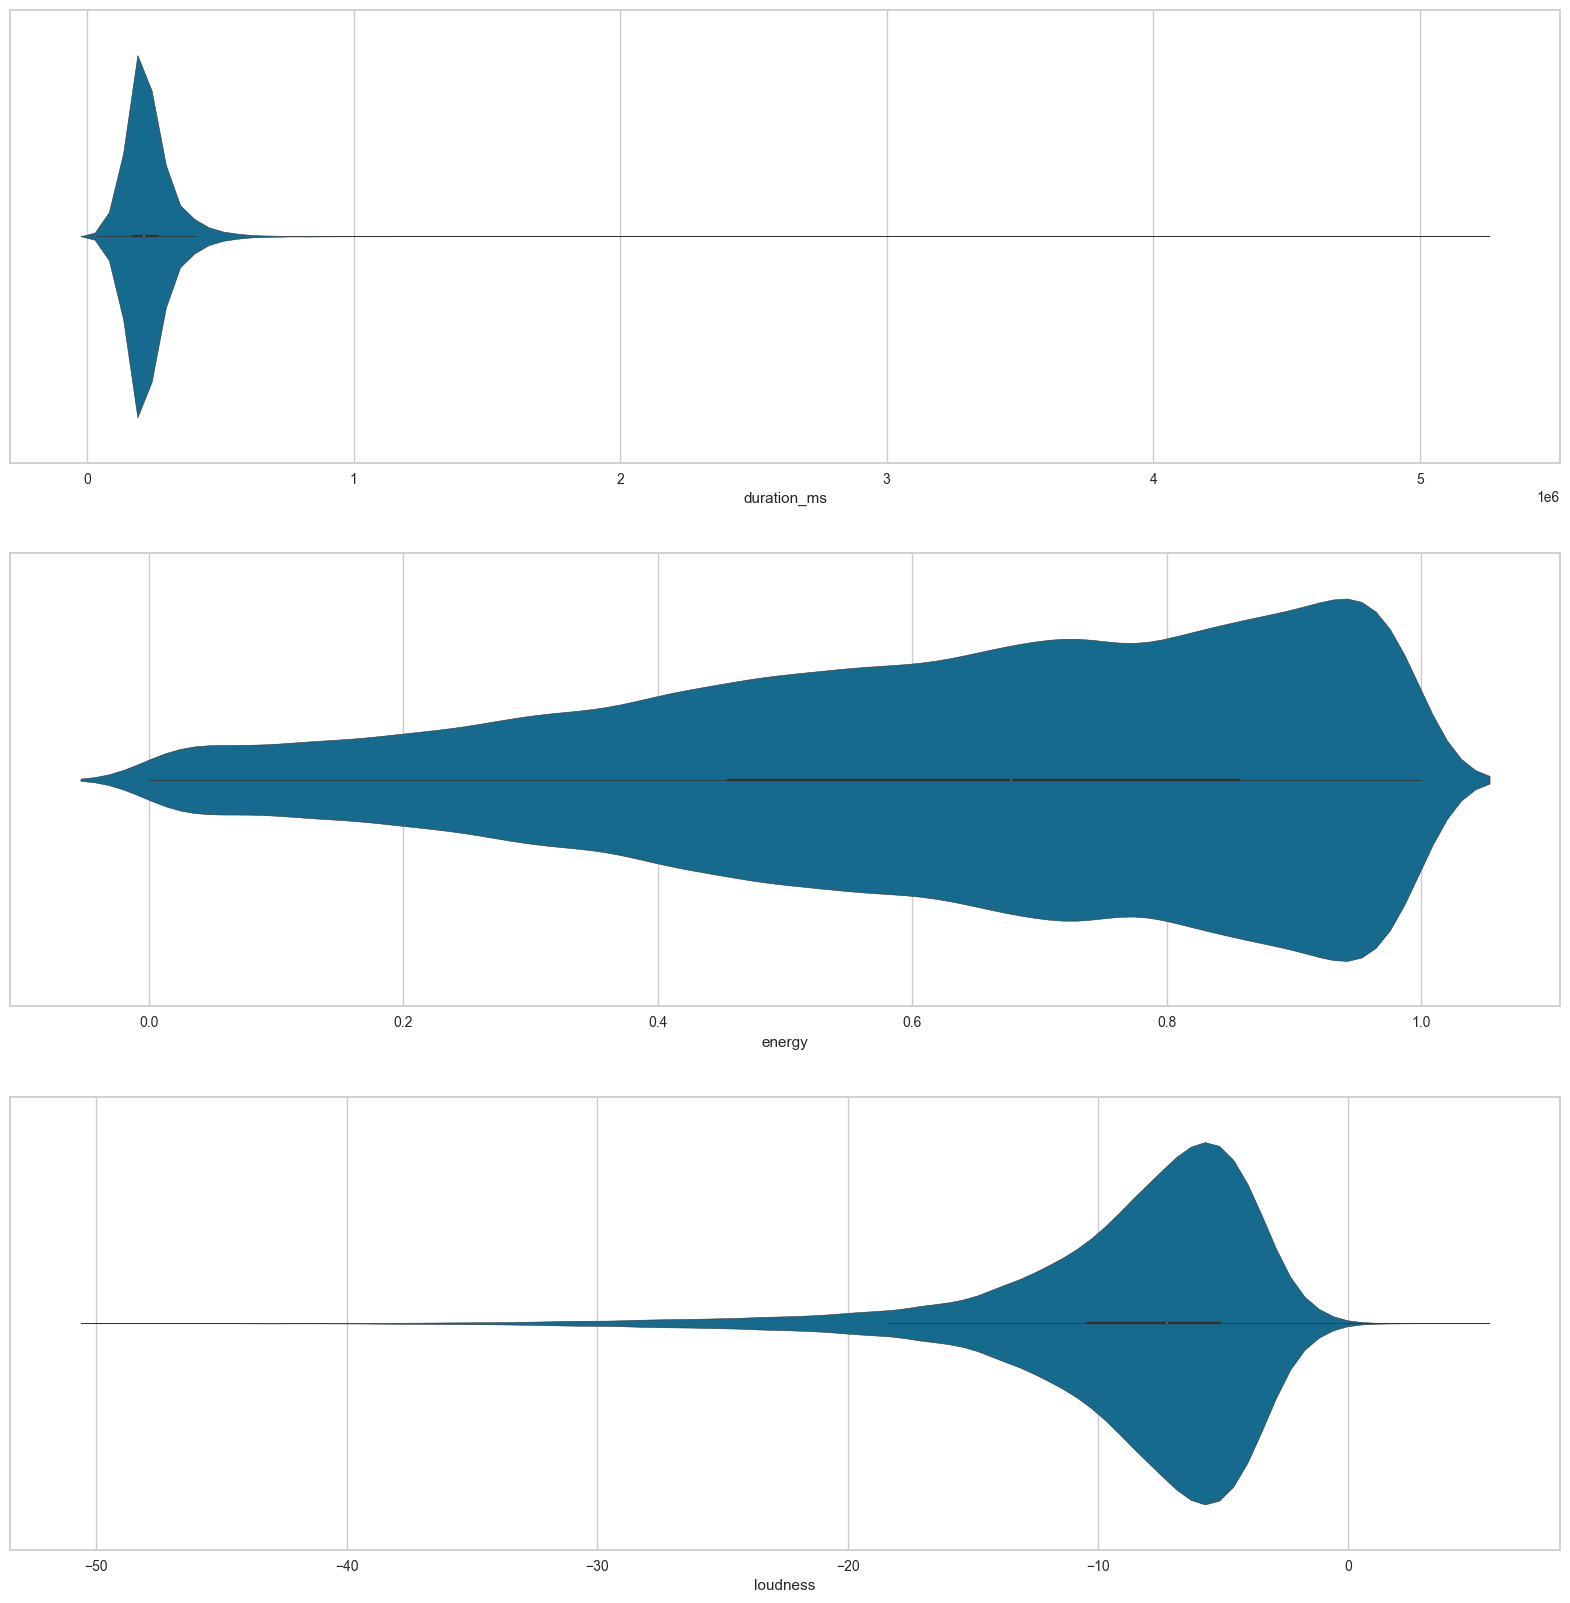

In [4]:
f, axes = plt.subplots(3, 1, figsize=(20, 20))

sb.violinplot(data = cleaned_tracks["duration_ms"], orient = "h", ax = axes[0])
sb.violinplot(data = cleaned_tracks["energy"], orient = "h", ax = axes[1])
sb.violinplot(data = cleaned_tracks["loudness"], orient = "h", ax = axes[2])

### Correlation to duration_ms
Some sound features are related to shorter/longer track times, such as more instrumental music having longer track time. Thus, we have to quantify their correlation to the track times.

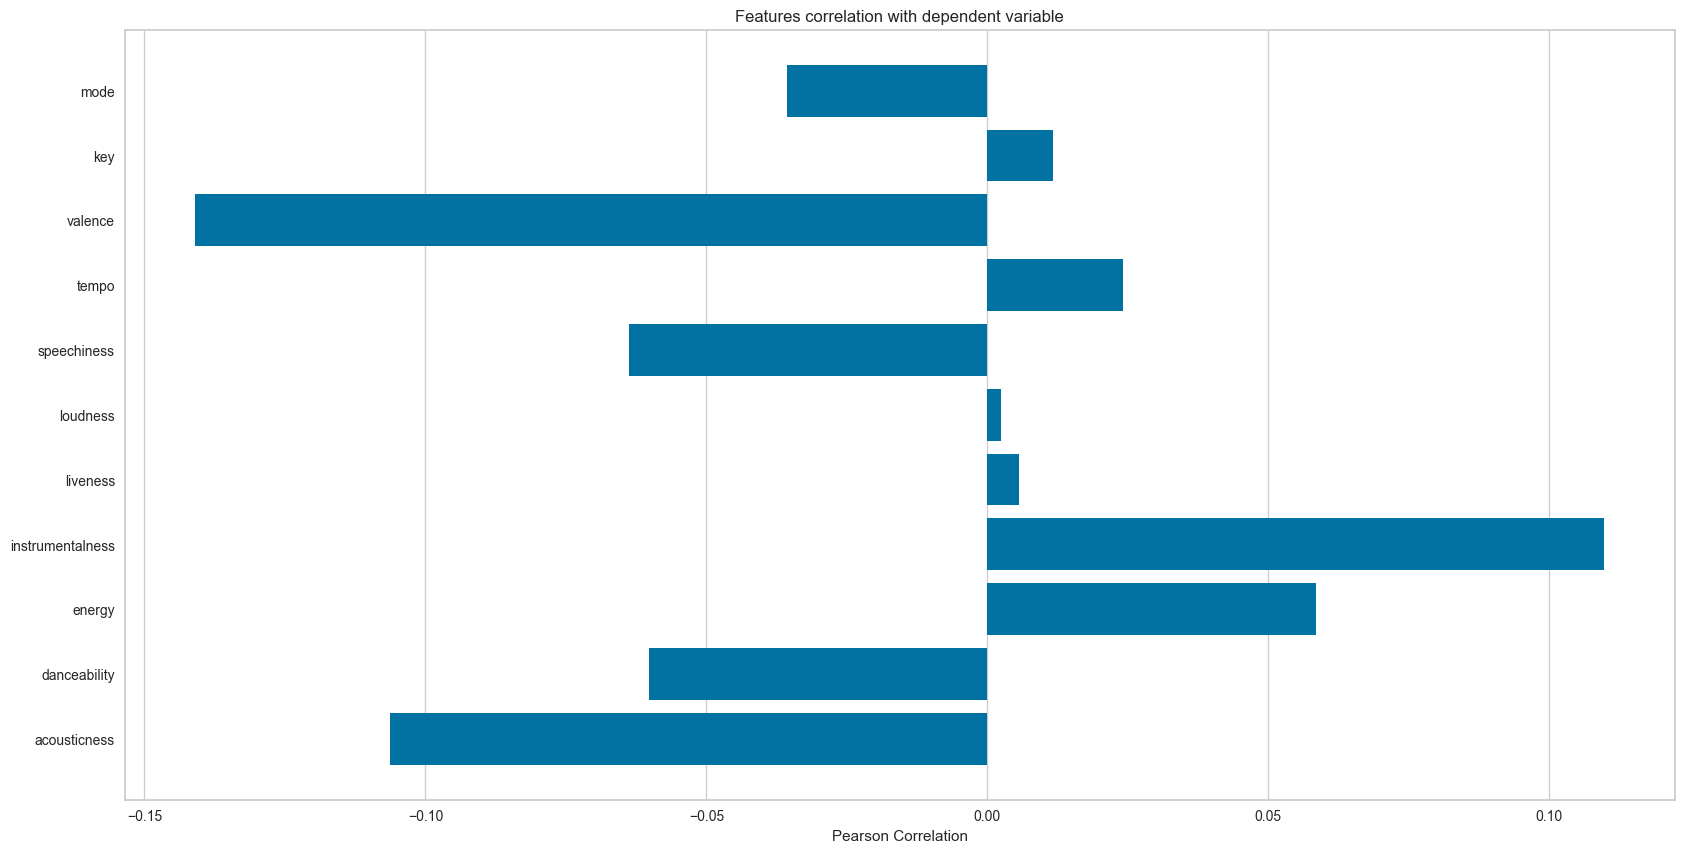

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [5]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','key','mode']

X, y = cleaned_tracks[feature_names], cleaned_tracks['duration_ms']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,10)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()


Here, we see that each of the song features only have very weak correlations to duration_ms.

### Now, we try to examine the general differences in certain sound features between genres
We first build a new DataFrame with the tracks in the top 10 genres with the most tracks

In [6]:
# Get the top 10 genres in the tracks dataset by frequency of occurence
top_genres = cleaned_tracks['track_genre'].value_counts().nlargest(10)
print(top_genres)

# Since top_genres is a pandas series, convert the indices, which are the genres, into a list
top_genres_list = top_genres.index.tolist()
print(top_genres_list)

# Create a new DataFrame consisting only of the tracks in the top 10 genres
genre_tracks = pd.DataFrame()
for genre in top_genres_list:

  # Gets the index of the rows that contain tracks in the specified genre
  rows = cleaned_tracks.loc[cleaned_tracks["track_genre"].str.contains(genre)]

  # Appends the tracks in the above specified rows into the genre_tracks DataFrame
  genre_tracks = pd.concat([genre_tracks, rows], ignore_index=True)

print(genre_tracks.shape)

track_genre
study          996
black-metal    991
comedy         987
heavy-metal    985
bluegrass      978
forro          968
malay          965
grindcore      965
iranian        958
idm            958
Name: count, dtype: int64
['study', 'black-metal', 'comedy', 'heavy-metal', 'bluegrass', 'forro', 'malay', 'grindcore', 'iranian', 'idm']
(9751, 22)


### Visualising the differences in sound features of the genres
The values for the specified features between all the tracks in the genre are added up in this graph

In [7]:
# Get the top 10 genres in the tracks dataset by frequency of occurence
top_genres2 = cleaned_tracks['track_genre'].value_counts().nlargest(10)
print(top_genres2)

# Since top_genres is a pandas series, convert the indices, which are the genres, into a list
top_genres_list2 = top_genres2.index.tolist()
print(top_genres_list2)

# Create a new DataFrame consisting only of the tracks in the top 10 genres
genre_tracks2 = pd.DataFrame()
for genre in top_genres_list2:
  rows = cleaned_tracks.loc[cleaned_tracks["track_genre"].str.contains(genre)]
  genre_tracks2 = pd.concat([genre_tracks2, rows], ignore_index=True)
  print(genre_tracks2.shape)

track_genre
study          996
black-metal    991
comedy         987
heavy-metal    985
bluegrass      978
forro          968
malay          965
grindcore      965
iranian        958
idm            958
Name: count, dtype: int64
['study', 'black-metal', 'comedy', 'heavy-metal', 'bluegrass', 'forro', 'malay', 'grindcore', 'iranian', 'idm']
(996, 22)
(1987, 22)
(2974, 22)
(3959, 22)
(4937, 22)
(5905, 22)
(6870, 22)
(7835, 22)
(8793, 22)
(9751, 22)


In [8]:
fig = px.bar(genre_tracks2, x='track_genre', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

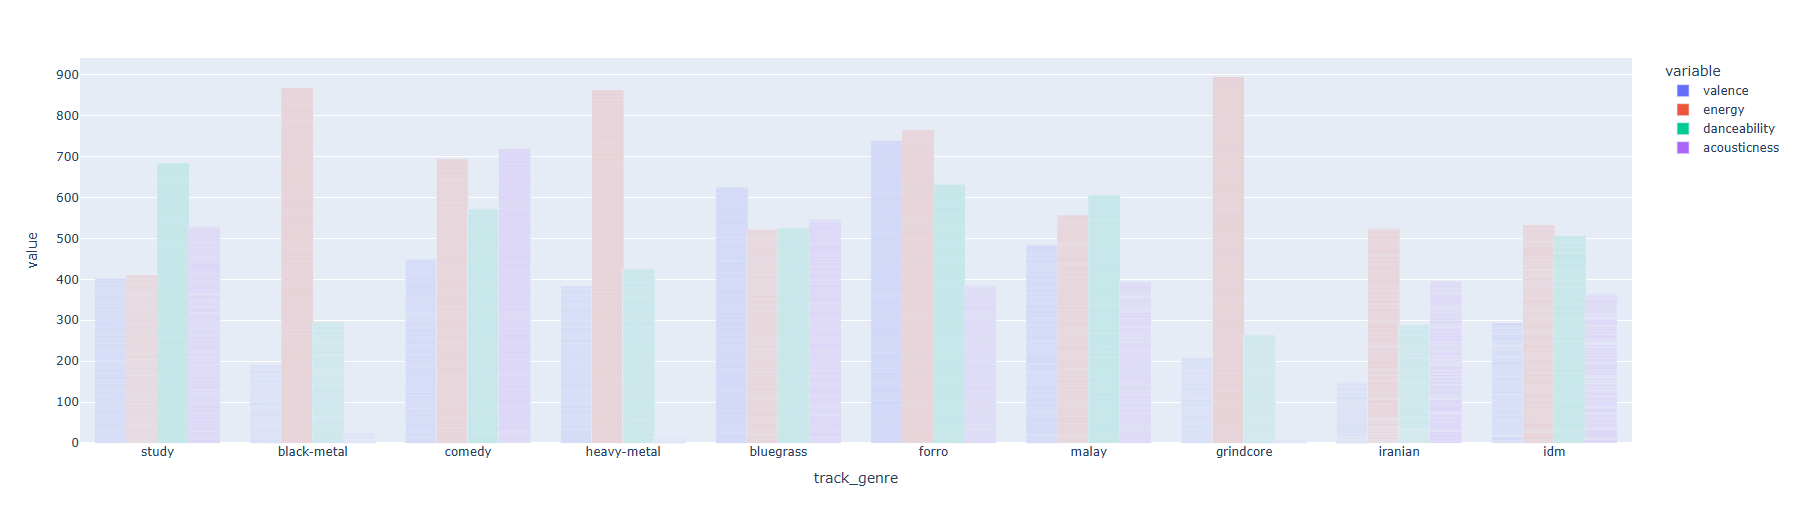